# Семинар 5: PyTorch

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
import torchvision
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

### 1. Сравнение **PyTorch** и **NumPy**

Можно создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [3]:
a = np.random.rand(5, 3)
a

array([[0.50104024, 0.29652634, 0.98046938],
       [0.21742953, 0.59543503, 0.89299876],
       [0.81548227, 0.29923219, 0.9483732 ],
       [0.83172711, 0.08319606, 0.98007423],
       [0.00160086, 0.20712182, 0.40730688]])

In [4]:
# размеры массива
a.shape

(5, 3)

In [5]:
# сложение
a + 5

array([[5.50104024, 5.29652634, 5.98046938],
       [5.21742953, 5.59543503, 5.89299876],
       [5.81548227, 5.29923219, 5.9483732 ],
       [5.83172711, 5.08319606, 5.98007423],
       [5.00160086, 5.20712182, 5.40730688]])

In [6]:
# матричное умножение
a @ a.T

array([[1.3002894 , 1.16106105, 1.42717053, 1.40233135, 0.46157109],
       [1.16106105, 1.19926526, 1.20237934, 1.10558496, 0.4874002 ],
       [1.42717053, 1.20237934, 1.65396295, 1.63262978, 0.44956191],
       [1.40233135, 1.10558496, 1.63262978, 1.65923708, 0.41775418],
       [0.46157109, 0.4874002 , 0.44956191, 0.41775418, 0.2088009 ]])

In [7]:
# среднее по колонкам
a.mean(axis = 1)

array([0.59267865, 0.56862111, 0.68769588, 0.6316658 , 0.20534319])

In [8]:
# решейп
a.reshape(3, 5).shape

(3, 5)


1. При помощи **NumPy** посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [9]:
sm = np.sum(np.arange(1, 10001)**2)

In [10]:
sm

333383335000

Аналогичные операции в **PyTorch** очень похожи, но иногда имеют немного другой синтаксис

In [12]:
# случайный тензор
x = torch.rand(5, 3)
x

tensor([[0.4420, 0.3071, 0.5822],
        [0.8765, 0.5265, 0.2154],
        [0.7333, 0.8495, 0.6123],
        [0.0121, 0.5552, 0.4499],
        [0.2062, 0.0643, 0.2967]])

In [13]:
# размеры тензора
x.shape

torch.Size([5, 3])

In [14]:
# тоже размеры тензора
x.size()

torch.Size([5, 3])

In [15]:
# сложение
x + 5

tensor([[5.4420, 5.3071, 5.5822],
        [5.8765, 5.5265, 5.2154],
        [5.7333, 5.8495, 5.6123],
        [5.0121, 5.5552, 5.4499],
        [5.2062, 5.0643, 5.2967]])

In [16]:
# матричное умножение
x.mm(x.t())

tensor([[0.6286, 0.6745, 0.9414, 0.4378, 0.2836],
        [0.6745, 1.0918, 1.2218, 0.3998, 0.2785],
        [0.9414, 1.2218, 1.6341, 0.7560, 0.3875],
        [0.4378, 0.3998, 0.7560, 0.5109, 0.1717],
        [0.2836, 0.2785, 0.3875, 0.1717, 0.1347]])

In [ ]:
# очередное матричное умножение
torch.matmul(x, x.t())
torch.matmul(x, x.transpose(1,0)) #какие оси меняются

tensor([[0.6286, 0.6745, 0.9414, 0.4378, 0.2836],
        [0.6745, 1.0918, 1.2218, 0.3998, 0.2785],
        [0.9414, 1.2218, 1.6341, 0.7560, 0.3875],
        [0.4378, 0.3998, 0.7560, 0.5109, 0.1717],
        [0.2836, 0.2785, 0.3875, 0.1717, 0.1347]])

In [19]:
# поэлементное умножение
x * x

tensor([[1.9537e-01, 9.4287e-02, 3.3893e-01],
        [7.6824e-01, 2.7719e-01, 4.6393e-02],
        [5.3772e-01, 7.2157e-01, 3.7486e-01],
        [1.4564e-04, 3.0830e-01, 2.0245e-01],
        [4.2518e-02, 4.1328e-03, 8.8047e-02]])

In [20]:
# среднее по колонкам
x.mean(dim = 1)

tensor([0.4437, 0.5395, 0.7317, 0.3391, 0.1891])

In [23]:
# решейп
x.view(3,5).shape

torch.Size([3, 5])

In [22]:
# или так
x.reshape([3,5]).shape

torch.Size([3, 5])

Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог **NumPy** операции в **PyTorch**


При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [25]:
sm = torch.sum(torch.arange(1, 10001)**2)
sm.item()

333383335000

### 2. Создаем тензоры в **PyTorch** и изучаем базовые операции

In [26]:
# пустой тензор
x = torch.empty(5,3)
x

tensor([[1.5766e-19, 1.0256e-08, 4.2004e-05],
        [3.1129e+12, 1.0838e-08, 1.6412e-07],
        [4.2726e-05, 1.2962e+16, 2.1707e-18],
        [7.0952e+22, 1.7748e+28, 1.8176e+31],
        [7.2708e+31, 5.0778e+31, 3.2608e-12]])

In [27]:
# тензор с нулями и указанием типов чисел
x = torch.zeros(5, 3, dtype = torch.float32)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [28]:
# конструируем тензор из питоновского листа
x = torch.tensor([5.5, 7])
x

tensor([5.5000, 7.0000])

In [29]:
# используем уже созданный тензор для создания тензора из единичек
x1 = x.new_ones(5,3)
x1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [30]:
# создаем случайный тензор с размерами другого тензора
x = torch.randn_like(x1)
x

tensor([[ 1.9228,  1.2819,  1.1862],
        [ 2.4253, -1.4363,  0.3582],
        [ 0.9665, -1.0634, -0.0554],
        [-0.1837,  1.0819,  1.2534],
        [-1.8615,  0.6577, -0.3397]])

In [31]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

In [32]:
x

tensor([[0.5993, 0.6284, 0.4679],
        [0.5228, 0.4067, 0.2024],
        [0.6439, 0.6089, 0.0929],
        [0.6651, 0.9975, 0.1965],
        [0.3788, 0.3111, 0.7056]])

In [33]:
y

tensor([[0.7721, 0.2081, 0.4143],
        [0.8719, 0.9885, 0.4840],
        [0.9325, 0.3819, 0.6317],
        [0.5520, 0.1212, 0.1050],
        [0.3151, 0.9009, 0.7596]])

In [34]:
# сложение
x + y

tensor([[1.3714, 0.8366, 0.8822],
        [1.3947, 1.3952, 0.6864],
        [1.5765, 0.9908, 0.7246],
        [1.2171, 1.1187, 0.3015],
        [0.6939, 1.2120, 1.4652]])

In [35]:
# очередное сложение
z = torch.add(x, y)

In [36]:
# наконец, ещё одно сложение!
torch.add(x, y, out = x)

tensor([[1.3714, 0.8366, 0.8822],
        [1.3947, 1.3952, 0.6864],
        [1.5765, 0.9908, 0.7246],
        [1.2171, 1.1187, 0.3015],
        [0.6939, 1.2120, 1.4652]])

In [37]:
# добавили измерение в начало, аналог броадкастинга
x.unsqueeze(0).size()

torch.Size([1, 5, 3])

In [38]:
# убрали одно единичное измерение
x.unsqueeze(0).unsqueeze(1).squeeze(0).size()

torch.Size([1, 5, 3])

In [39]:
# убрали все единичные измерения
x.unsqueeze(0).unsqueeze(1).squeeze().size()

torch.Size([5, 3])

In [40]:
# операции без _ не меняют тензор, а создают копию
x.unsqueeze(0)
x.size()

torch.Size([5, 3])

In [41]:
# операции с _ меняют тензор
x.unsqueeze_(0)
x.size()

torch.Size([1, 5, 3])

In [42]:
#можно переводить в np и наоборот
torch.from_numpy(x.numpy())

tensor([[[1.3714, 0.8366, 0.8822],
         [1.3947, 1.3952, 0.6864],
         [1.5765, 0.9908, 0.7246],
         [1.2171, 1.1187, 0.3015],
         [0.6939, 1.2120, 1.4652]]])

**2.1** считаем производные

In [43]:
# Уравнение: y = ax + b
# Производная: y' = a

x = torch.tensor(5.0, requires_grad=True)
assert x.grad is None

y = 10 * x - 1
y.backward()

print(f"x.grad = {x.grad}")

x.grad = 10.0


In [44]:
x = torch.tensor(np.pi, requires_grad=True)
y = torch.sin(x)
y.backward()

print(f"x.grad = {x.grad}")

x.grad = -1.0


In [45]:
x = torch.tensor(8.0, requires_grad=True)
y = torch.log(x)
y.backward()

print(f"x.grad = {x.grad}")

x.grad = 0.125


In [46]:
y = torch.log(x)
y.backward()

print(f"x.grad = {x.grad}")

x.grad = 0.25


In [47]:
y = torch.log(x)
y.backward()

print(f"x.grad = {x.grad}")

x.grad = 0.375


In [48]:
x.grad.zero_()

y = torch.log(x)
y.backward()

print(f"x.grad = {x.grad}")

x.grad = 0.125


In [49]:
x = torch.tensor(1.0, requires_grad=True)

numerator = x ** 2 - x + 1
denominator = torch.cos(torch.log(x)) ** 2
fraction = numerator / denominator
y = torch.exp(-fraction)
y.backward()

print(f"x.grad = {x.grad}")

x.grad = -0.3678794503211975


In [50]:
x = torch.tensor([10.0, -10.0], requires_grad=True)
y = torch.dot(
    x,
    torch.tensor([2.0, 3.0])
)
y.backward()

print(f"x.grad = {x.grad}")

x.grad = tensor([2., 3.])


In [51]:
w = torch.tensor([10.0, 10.0], requires_grad=True)
x = [3.0, 5.0]
y = 100
a = torch.dot(
    w,
    torch.tensor(x)
)
Q = (y - a) ** 2
Q.backward()

print(f"w.grad = {w.grad}")

w.grad = tensor([-120., -200.])


### 3. Работаем с градиентами руками

In [52]:
# скачиваем The Boston Housing Dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

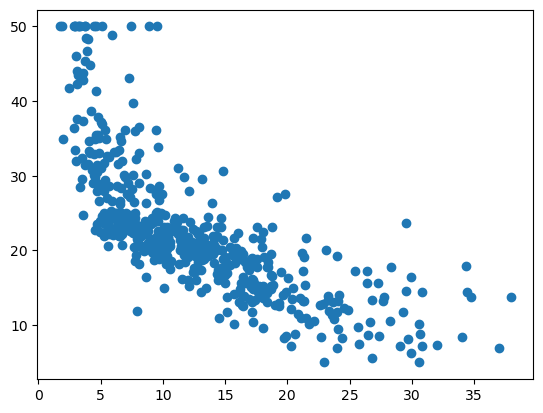

In [53]:
plt.scatter(data[:, -1], target)

В **PyTorch** есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

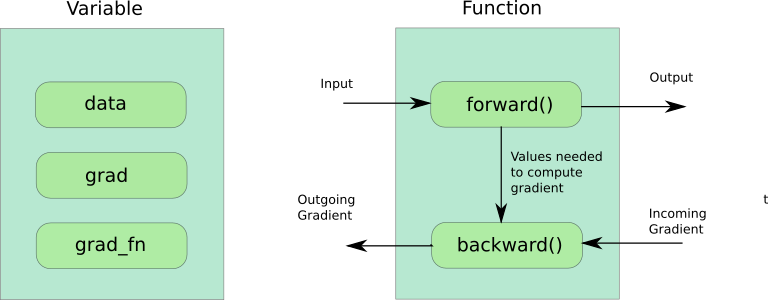

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенты для всех тензоров, у которых `requires_grad=True`.

In [54]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(data[:, -1] / data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [55]:
x.size(), y.size()

(torch.Size([506]), torch.Size([506]))

Создадим модель линейной регрессии и посчитаем градиент лосса

In [56]:
y_pred = w*x + b
loss = torch.mean((y_pred - y)**2)
loss.backward()

In [57]:
# сделали операции и посчитали градиенты, появилось значение соответствующих полей
assert w.grad is not None
assert b.grad is not None

print(f"dL/dw = {w.grad}")
print(f"dL/db = {b.grad}")

dL/dw = tensor([-12.2982])
dL/db = tensor([-44.5560])


Для доступа к значениям в тензоре используйте атрибут `.data`:

In [58]:
w.data, w.grad

(tensor([0.0392]), tensor([-12.2982]))

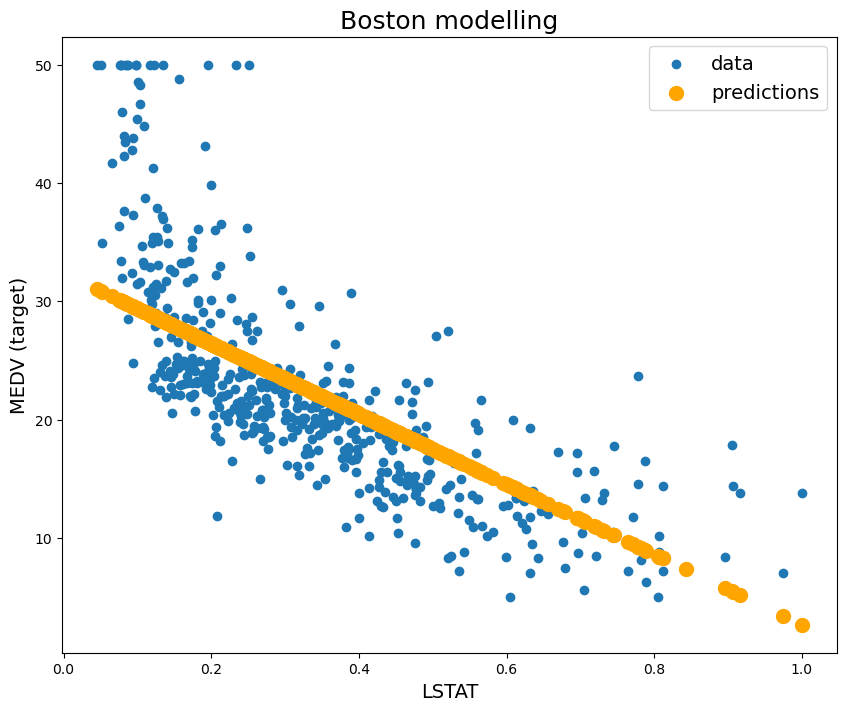

loss =  39.92841


In [60]:
from IPython.display import clear_output

for i in range(500):
    y_pred = w*x + b
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data = w.data - 0.05 * w.grad
    b.data = b.data - 0.05 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.zero_()
    b.grad.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10, 8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(
            x.data.numpy(),
            y_pred.data.numpy(),
            color="orange",
            linewidth=5,
            label="predictions",
        )
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break

### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросети в **PyTorch**, нужно освоить три вещи:

1. Как формировать батчи и подавать их на вход сети
2. Как задать архитектуру сети
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы иметь возможность итерироваться по данным и применять к ним преобразования, нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

У такого класса **должно быть** три метода:

* `__init__` — создаёт поля класса (например, путь к папке с файлами с тренировочными объектами)
* `__len__` — возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` — по индексу возвращает семпл и таргет к нему


In [61]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {
            "sample": torch.tensor(self.x[idx, :], dtype=torch.float),
            "target": self.y[idx],
        }

In [62]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [63]:
our_dataset = RandomDataset(x, y)

In [64]:
our_dataset.__getitem__(1)

{'sample': tensor([0.9731, 0.5868, 0.4875, 0.1744, 0.8713]),
 'target': 0.6697678676336581}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`.

In [65]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [66]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.4531, 0.4347, 0.8637, 0.8066, 0.4190],
        [0.9731, 0.5868, 0.4875, 0.1744, 0.8713],
        [0.2802, 0.4694, 0.1019, 0.7441, 0.1206],
        [0.7816, 0.1459, 0.7853, 0.6808, 0.2218]])
Target:
tensor([0.2120, 0.6698, 0.6545, 0.2000], dtype=torch.float64)


In [67]:
from torch.utils.data import DataLoader

**Как сделать нейросеть**

Для того, чтобы в **PyTorch** создавать нейросети, используется модуль `torch.nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.


In [69]:
model = nn.Sequential()

model.add_module('l1', nn.Linear(5, 30))
model.add_module('l2', nn.ReLU())
model.add_module('l3', nn.Linear(30, 1))

another_model = nn.Sequential(nn.Linear(5, 30), nn.ReLU(), nn.Linear(30, 1))

In [70]:
y_pred = model(batch["sample"])  # получили предсказания модели

In [71]:
y_pred

tensor([[0.1219],
        [0.1782],
        [0.0641],
        [0.0960]], grad_fn=<AddmmBackward0>)

**Как написать цикл обучения и отслеживать метрики**

Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [72]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/", train=False, download=True, transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=False, num_workers=1
)

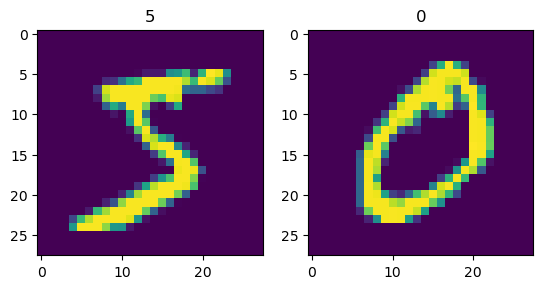

In [73]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [75]:
model = nn.Sequential(nn.Flatten(),
                     nn.Linear(28*28, 128),
                        nn.ReLU(),
                      nn.Linear(128, 10))

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

Веса моделей хранятся в виде матриц и выглядят так:

In [77]:
[x for x in model.named_parameters()]

[('1.weight',
  Parameter containing:
  tensor([[ 0.0213,  0.0213, -0.0080,  ..., -0.0232, -0.0132, -0.0275],
          [-0.0213, -0.0299, -0.0347,  ..., -0.0056, -0.0324, -0.0274],
          [ 0.0161, -0.0105, -0.0195,  ...,  0.0317, -0.0284,  0.0058],
          ...,
          [-0.0349, -0.0243, -0.0159,  ...,  0.0077, -0.0301,  0.0070],
          [ 0.0225,  0.0347,  0.0225,  ...,  0.0223,  0.0324,  0.0015],
          [ 0.0326,  0.0195, -0.0185,  ...,  0.0296, -0.0224, -0.0345]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-0.0333, -0.0029, -0.0297,  0.0180,  0.0269,  0.0009, -0.0309, -0.0058,
          -0.0082, -0.0067, -0.0247,  0.0186, -0.0099,  0.0103, -0.0340,  0.0296,
          -0.0184, -0.0006,  0.0311,  0.0105,  0.0188,  0.0302, -0.0169, -0.0341,
           0.0005,  0.0239, -0.0221,  0.0068, -0.0105,  0.0265,  0.0336, -0.0308,
           0.0230, -0.0034, -0.0220, -0.0204,  0.0241, -0.0143, -0.0330, -0.0337,
           0.0204, -0.0063,  0.0140, 

Одним из основных преимуществ PyTorch является возможность использования GPU-ускорителей на CUDA-совместимых графических процессорах Nvidia Compute Unified Device Architecture (CUDA) и Apple Metal Performance Shaders (MPS).

Во-первых, мы должны проверить, доступен ли графический процессор, с помощью метода ```is_available()```.

In [78]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [80]:
device

device(type='cpu')

Как только мы определили, что один или несколько графических процессоров доступны, нам нужно поместить наши данные туда, где графический процессор сможет их увидеть. Ваш процессор выполняет вычисления над данными в оперативной памяти вашего компьютера. К вашему графическому процессору подключена выделенная память. Всякий раз, когда вы хотите выполнить вычисление на устройстве, вы должны переместить все данные, необходимые для этого вычисления, в память, доступную этому устройству.

По умолчанию новые тензоры создаются на CPU, поэтому нам нужно указать, когда мы хотим создать наш тензор на графическом процессоре, с помощью необязательного аргумента устройства.

In [79]:
x = torch.rand(2, 2, device=device)
x

tensor([[0.0170, 0.4287],
        [0.6221, 0.5216]])

Чтобы выполнять вычисления с использованием двух или более тензоров, все тензоры должны находиться на одном устройстве.

Если у вас уже есть тензор, расположенный на одном устройстве, вы можете переместить его на другое с помощью метода ```to()```.
Перенесем созданную ранее модель на наш новый девайс.

In [81]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
)

In [83]:
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):  # берем батч из трейн лоадера
          y_pred = model(x_train.to(device))# делаем предсказания
          loss = F.cross_entropy(y_pred, y_train.to(device))# считаем лосс
          loss.backward()# считаем градиенты обратным проходом
          optimizer.step()# обновляем параметры сети
          optimizer.zero_grad()# обнуляем посчитанные градиенты параметров

    val_loss = []  # сюда будем складывать **средний по бачу** лосс
    val_accuracy = []
    with torch.no_grad():  # на валидации запрещаем фреймворку считать градиенты по параметрам
        for x_val, y_val in tqdm(
            val_dataloader
        ):  # берем батч из валидационного лоадера
            y_pred = model(x_val.to(device))  # делаем предсказания
            loss = F.cross_entropy(y_pred, y_val.to(device))  # считаем лосс
            val_loss.append(loss.cpu().numpy())  # добавляем в массив
            val_accuracy.extend(
                (torch.argmax(y_pred, dim=-1) == y_val.to(device)).cpu().numpy().tolist()
            )

    # печатаем метрики
    print(
        f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}"
    )

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.2227286398410797, accuracy: 0.9364


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 1, loss: 0.15399909019470215, accuracy: 0.9557


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.11344987899065018, accuracy: 0.9674


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 3, loss: 0.09416475892066956, accuracy: 0.9715


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.08622860163450241, accuracy: 0.9741
